# **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import fileinput
import warnings
warnings.filterwarnings('ignore')
import os

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

# **2. Loading Data**

In [2]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])


df_train=pd.read_csv('../input/nslkdd/KDDTrain+.txt',header=None,names=columns)
df_test=pd.read_csv('../input/nslkdd/KDDTest+.txt',header=None,names=columns)

# Sample 44000 records from the training data
sample_size = 44000
sampled_df_train = df_train.sample(n=sample_size, random_state=42)

In [3]:
def modify_arff_file(arff_file, modified_arff_file):
    # Open the original ARFF file in read mode
    with open(arff_file, 'r') as original_file:
        # Read the lines of the original ARFF file
        lines = original_file.readlines()

    # Modify the lines to replace " 'icmp'" with 'icmp'
    modified_lines = [line.replace(" 'icmp'", "'icmp'") for line in lines]

    # Write the modified lines to a new ARFF file
    with open(modified_arff_file, 'w') as modified_file:
        modified_file.writelines(modified_lines)
        
test_arff_file = '/kaggle/input/nslkdd/KDDTest+.arff'
modified_test_arff_file = '/kaggle/working/KDDTest+_modified.arff'

modify_arff_file(test_arff_file, modified_test_arff_file)

train_arff_file = '/kaggle/input/nslkdd/KDDTrain+.arff'
modified_train_arff_file = '/kaggle/working/KDDTrain+_modified.arff'

modify_arff_file(train_arff_file, modified_train_arff_file)

test_data, meta = arff.loadarff('/kaggle/working/KDDTest+_modified.arff')
train_data, meta = arff.loadarff('/kaggle/working/KDDTrain+_modified.arff')

df_test2 = pd.DataFrame(test_data)
df_train2 = pd.DataFrame(train_data)

def convert_value(value):
    try:
        return float(value)
    except ValueError:
        return value.decode()

# Iterate over each column of the DataFrame
for column in df_test2.select_dtypes(include='object'):
    # Convert byte strings to either strings or integers
    df_test2[column] = df_test2[column].apply(convert_value)
    df_train2[column] = df_train2[column].apply(convert_value)

# Drop 'num_outbound_cmds' column
df_train2.drop(['num_outbound_cmds'], axis=1, inplace=True)

df_train2 = df_train2.sample(n=sample_size, random_state=42)

print(df_train2.shape)

(44000, 41)


# **3. Explanation of Dataset attributes/features:**

* Duration: duration of connection(in seconds)
* protocol_type: type of protocol (tcp, icmp, udp)
* Service: Network type (private, ftp_data, eco_i, telnet, http, smtp, ftp, ldap, pop_3, courier, discard, ecr_i, imap4, domain_u, mtp, systat, iso_tsap, other, csnet_ns, finger, uucp, whois, netbios_ns, link, Z39_50, sunrpc, auth, netbios_dgm, uucp_path, vmnet, domain, name, pop_2, http_443, urp_i, login, gopher, exec, time, remote_job, ssh, kshell, sql_net, shell, hostnames, echo, daytime, pm_dump, IRC, netstat, ctf, nntp, netbios_ssn, tim_i, supdup, bgp, nnsp, rje, printer, efs, X11, ntp_u, klogin, tftp_u)
* Flag: Flag status (REJ, SF, RSTO, S0, RSTR, SH, S3, S2, S1, RSTOS0, OTH)
* Src_bytes: Number of bytes transferred from source to destination
* Dst_bytes: Number of bytes transferred from destination to source
* Land: If connection is to same host land=1, else 0
* Wrong_fragment: Number of wrong fragments (0, 1, 3)
* Urgent: Number of urgent packets (0, 1, 2, 3)
* Hot: Number of “hot” indicators (0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 15, 18, 19, 22, 30, 101)
* Num_failed_logins: Number of failed logins (0, 1, 2, 3, 4)
* Logged_in: If logged in logged_in=1, else 0
* num_compromised: Number of compromised conditions (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 23, 25, 36, 49, 57, 165, 381, 611, 796)
* root_shell: If root shell is obtained root_shell=1, else 0
* su_attempted: If “su root” accesses, su_attempted=1, else 0
* num_root: Number of accessed roots (0, 1, 2, 3, 4, 5, 7, 8, 9, 17, 23, 26, 31, 45, 51, 145, 173, 401, 684, 878)
* num_file_creations: Number of file creations (0, 1, 2, 3, 4, 5, 6, 7, 100)
* num_shells: Number of shell prompt (0, 1, 2, 5)
* num_access_files: Number of operations on access files (0, 1, 2, 3, 4)
* num_outbound_cmds: Number of outbound commands
* is_host_login: If login is hot is_host_login=1, else 0
* is_guest_login: If login is guest is_guest_login=1, else 0
* Count No.: Number of connections to the same host in last 2 seconds
* srv_count: Number of connections to the same service in last 2 seconds
* serror_rate: Percentage of connection with syn error
* srv_serror_rate: Percentage of connection with syn error
* rerror_rate: Percentage of connection with rej error
* srv_rerror_rate: Percentage of connection with rej error
* same_srv_rate: Percentage of connection of same service
* diff_srv_rate: Percentage of connection of different service
* srv_diff_host_rate: Percentage of connection of different hosts
* dst_host_count: Number of connections of same destination host
* dst_host_srv_count: Number of connections of same destination host and service
* dst_host_same_srv_rate: Percentage of connections having same destination host and service
* dst_host_diff_srv_rate: Percentage of connections having different service on current host
* dst_host_same_src_port_rate: Percentage of connections of current host having same src port
* dst_host_srv_diff_host_rate: Percentage of connection of same service and different hosts
* dst_host_serror_rate: Percentage of connections of current host having S0 error 
* dst_host_srv_serror_rate: Percentage of connections of current host of a service having S0 error 
* dst_host_rerror_rate: Percentage of connections of current host that have rst error 
* dst_host_srv_rerror_rate: Percentage of connections of current host of service that have rst error 
* Attack: Type of attack (apache2, back, buffer_overflow, ftp_write, guess_passwd, httptunnel, imap, ipsweep, land, loadmodule, mailbomb, mscan, multihop, named, neptune, nmap, normal, perl, phf, pod, portsweep, processtable, ps, rootkit, saint, satan, sendmail, smurf, snmpgetattack, snmpguess, sqlattack, teardrop, udpstorm, warezmaster, worm, xlock, xsnoop, xterm) 
* Level: Threat level of the attack (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

# **4. Data Preparation**

In [4]:
len(sampled_df_train)

44000

In [5]:
sampled_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44000 entries, 378 to 119623
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     44000 non-null  int64  
 1   protocol_type                44000 non-null  object 
 2   service                      44000 non-null  object 
 3   flag                         44000 non-null  object 
 4   src_bytes                    44000 non-null  int64  
 5   dst_bytes                    44000 non-null  int64  
 6   land                         44000 non-null  int64  
 7   wrong_fragment               44000 non-null  int64  
 8   urgent                       44000 non-null  int64  
 9   hot                          44000 non-null  int64  
 10  num_failed_logins            44000 non-null  int64  
 11  logged_in                    44000 non-null  int64  
 12  num_compromised              44000 non-null  int64  
 13  root_shell        

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [7]:
sampled_df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,44000.000000,4.400000e+04,4.400000e+04,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.0,44000.0,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.00000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000
mean,291.434000,4.243927e+04,2.996588e+03,0.000205,0.021977,0.000205,0.220841,0.001409,0.396841,0.193273,0.001205,0.001045,0.216432,0.009500,0.000364,0.004250,0.0,0.0,0.010227,83.682750,27.580045,0.284382,0.282467,0.119776,0.120823,0.661551,0.063032,0.098745,181.662727,115.38575,0.521567,0.083303,0.150587,0.032739,0.284335,0.278577,0.118508,0.119745,19.495409
std,2631.493929,4.466461e+06,7.653465e+04,0.014301,0.248989,0.020779,2.243618,0.049524,0.489248,9.014617,0.034686,0.043681,10.039686,0.428481,0.021317,0.099111,0.0,0.0,0.100613,114.512283,72.595883,0.446432,0.447049,0.320126,0.323208,0.439344,0.180387,0.262509,99.555009,110.65306,0.448774,0.189673,0.311898,0.112541,0.444673,0.445666,0.306410,0.318967,2.304010
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,80.000000,10.00000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,62.00000,0.520000,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,4.980000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.00000,1.000000,0.070000,0.070000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42837.000000,6.933756e+08,7.028652e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,756.000000,1.000000,2.000000,857.000000,43.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [8]:
df_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.000488,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.022084,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


**We notice that num_outbound_cmds equals 0 for all the individuals of both datasets so we will drop it**

In [9]:
df_test.drop(['num_outbound_cmds'], axis=1, inplace=True)
sampled_df_train.drop(['num_outbound_cmds'], axis=1, inplace=True)

# **i. Remove duplicates**

In [10]:
print(df_test.shape)
df_test = df_test.drop_duplicates()
print(df_test.shape)

(22544, 42)
(22544, 42)


In [11]:
print(sampled_df_train.shape)
sampled_df_train = sampled_df_train.drop_duplicates()
print(sampled_df_train.shape)

(44000, 42)
(44000, 42)


**We have no duplicated in both the training an the testing datasets**

# **ii. Dealing with Missing values**

In [12]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [13]:
missing_percentage(df_test)

,Total,Percent
duration,0,0.0
protocol_type,0,0.0
service,0,0.0
flag,0,0.0
src_bytes,0,0.0
dst_bytes,0,0.0
land,0,0.0
wrong_fragment,0,0.0
urgent,0,0.0
hot,0,0.0


In [14]:
missing_percentage(sampled_df_train)

,Total,Percent
duration,0,0.0
protocol_type,0,0.0
service,0,0.0
flag,0,0.0
src_bytes,0,0.0
dst_bytes,0,0.0
land,0,0.0
wrong_fragment,0,0.0
urgent,0,0.0
hot,0,0.0


**We have no missing values in both datasets**

# **iii. Variables Balance**

In [15]:
print(sampled_df_train.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')


In [16]:
def calculate_value_frequencies(df, column):
    value_frequencies = df[column].value_counts()
    total_samples = df.shape[0]

    result_df = pd.DataFrame(columns=['Rank', 'Value', 'Frequency', 'Percentage'])

    for rank, (value, frequency) in enumerate(value_frequencies.items(), start=1):
        percentage = (frequency / total_samples) * 100
        temp_df = pd.DataFrame(data={'Rank': [rank], 'Value': [value], 'Frequency': [frequency], 'Percentage': [percentage]})
        result_df = pd.concat([result_df, temp_df], ignore_index=True)

    return result_df.set_index('Rank')

def plot_histogram(df, column, x=10, y=6):
    value_frequencies = calculate_value_frequencies(df, column)
    print(value_frequencies)
    plt.figure(figsize=(x, y))
    plt.bar(value_frequencies['Value'], value_frequencies['Frequency'])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

    plt.show()

                Value Frequency  Percentage
Rank                                       
1              normal     23495   53.397727
2             neptune     14368   32.654545
3             ipsweep      1292    2.936364
4               satan      1270    2.886364
5           portsweep      1001    2.275000
6               smurf       920    2.090909
7                nmap       544    1.236364
8                back       335    0.761364
9         warezclient       333    0.756818
10           teardrop       301    0.684091
11                pod        75    0.170455
12       guess_passwd        21    0.047727
13    buffer_overflow        11    0.025000
14        warezmaster         8    0.018182
15               land         7    0.015909
16               imap         5    0.011364
17            rootkit         4    0.009091
18          ftp_write         4    0.009091
19         loadmodule         2    0.004545
20                phf         1    0.002273
21                spy         1 

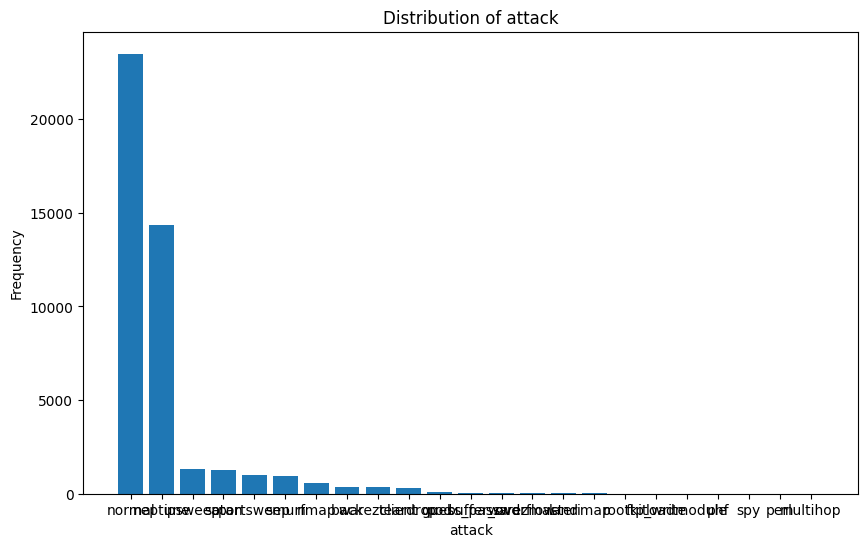

In [17]:
plot_histogram(sampled_df_train, 'attack')

**We have a lot of values with a percentage < 1% so grouping the values might help fix it. We can try grouping the attacks based on their type (normal, DoS, U2R, R2L, and Probe)**

In [18]:
attack_categories = {
    'normal': 'normal',
    'neptune': 'DoS',
    'back': 'DoS',
    'land': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    'worm': 'DoS',
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R',
    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'httptunnel': 'R2L',
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe'
}

sampled_df_train['attack'] = sampled_df_train['attack'].map(attack_categories)
df_test['attack'] = df_test['attack'].map(attack_categories)

       Value Frequency  Percentage
Rank                              
1     normal     23495   53.397727
2        DoS     16006   36.377273
3      Probe      4107    9.334091
4        R2L       374    0.850000
5        U2R        18    0.040909


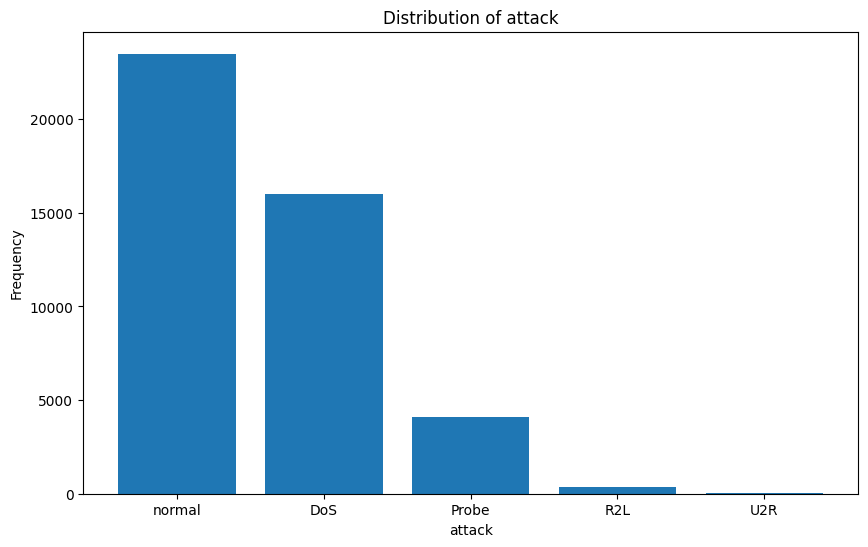

In [19]:
plot_histogram(sampled_df_train, 'attack')

     Value Frequency  Percentage
Rank                            
1       21     21838   49.631818
2       18      7224   16.418182
3       20      6664   15.145455
4       19      3665    8.329545
5       15      1370    3.113636
6       17      1054    2.395455
7       16       868    1.972727
8       14       248    0.563636
9       12       248    0.563636
10      11       247    0.561364
11      13       150    0.340909
12      10        93    0.211364
13       9        61    0.138636
14       7        49    0.111364
15       8        45    0.102273
16       6        35    0.079545
17       4        29    0.065909
18       5        28    0.063636
19       3        26    0.059091
20       1        22    0.050000
21       0        19    0.043182
22       2        17    0.038636


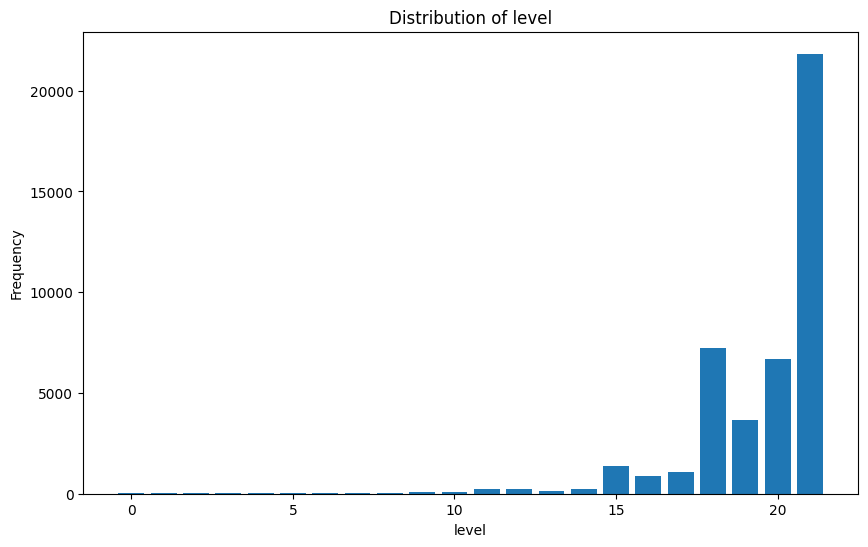

In [20]:
plot_histogram(sampled_df_train, 'level')

**The level variable is highly unbalanced with 89.58% of the levels being superior or equal to 18 so we decided to drop it since most of the levels are high**

In [21]:
df_test.drop(['level'], axis=1, inplace=True)
sampled_df_train.drop(['level'], axis=1, inplace=True)

        Value Frequency  Percentage
Rank                               
1      normal     23495   53.397727
2     anomaly     20505   46.602273


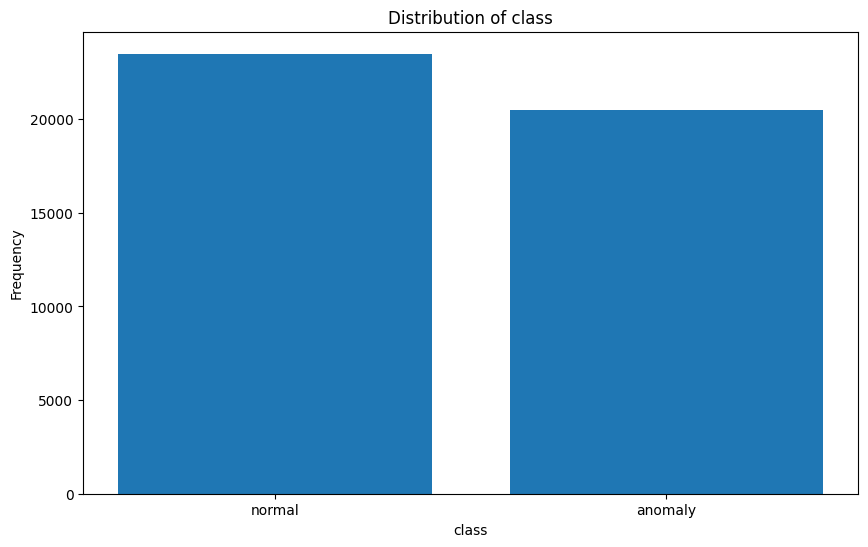

In [22]:
plot_histogram(df_train2, 'class')

**There is some imbalance in the class variable but its insignificant**

# **iv. Visualization and Feature Relations**

**Correlation of Features**

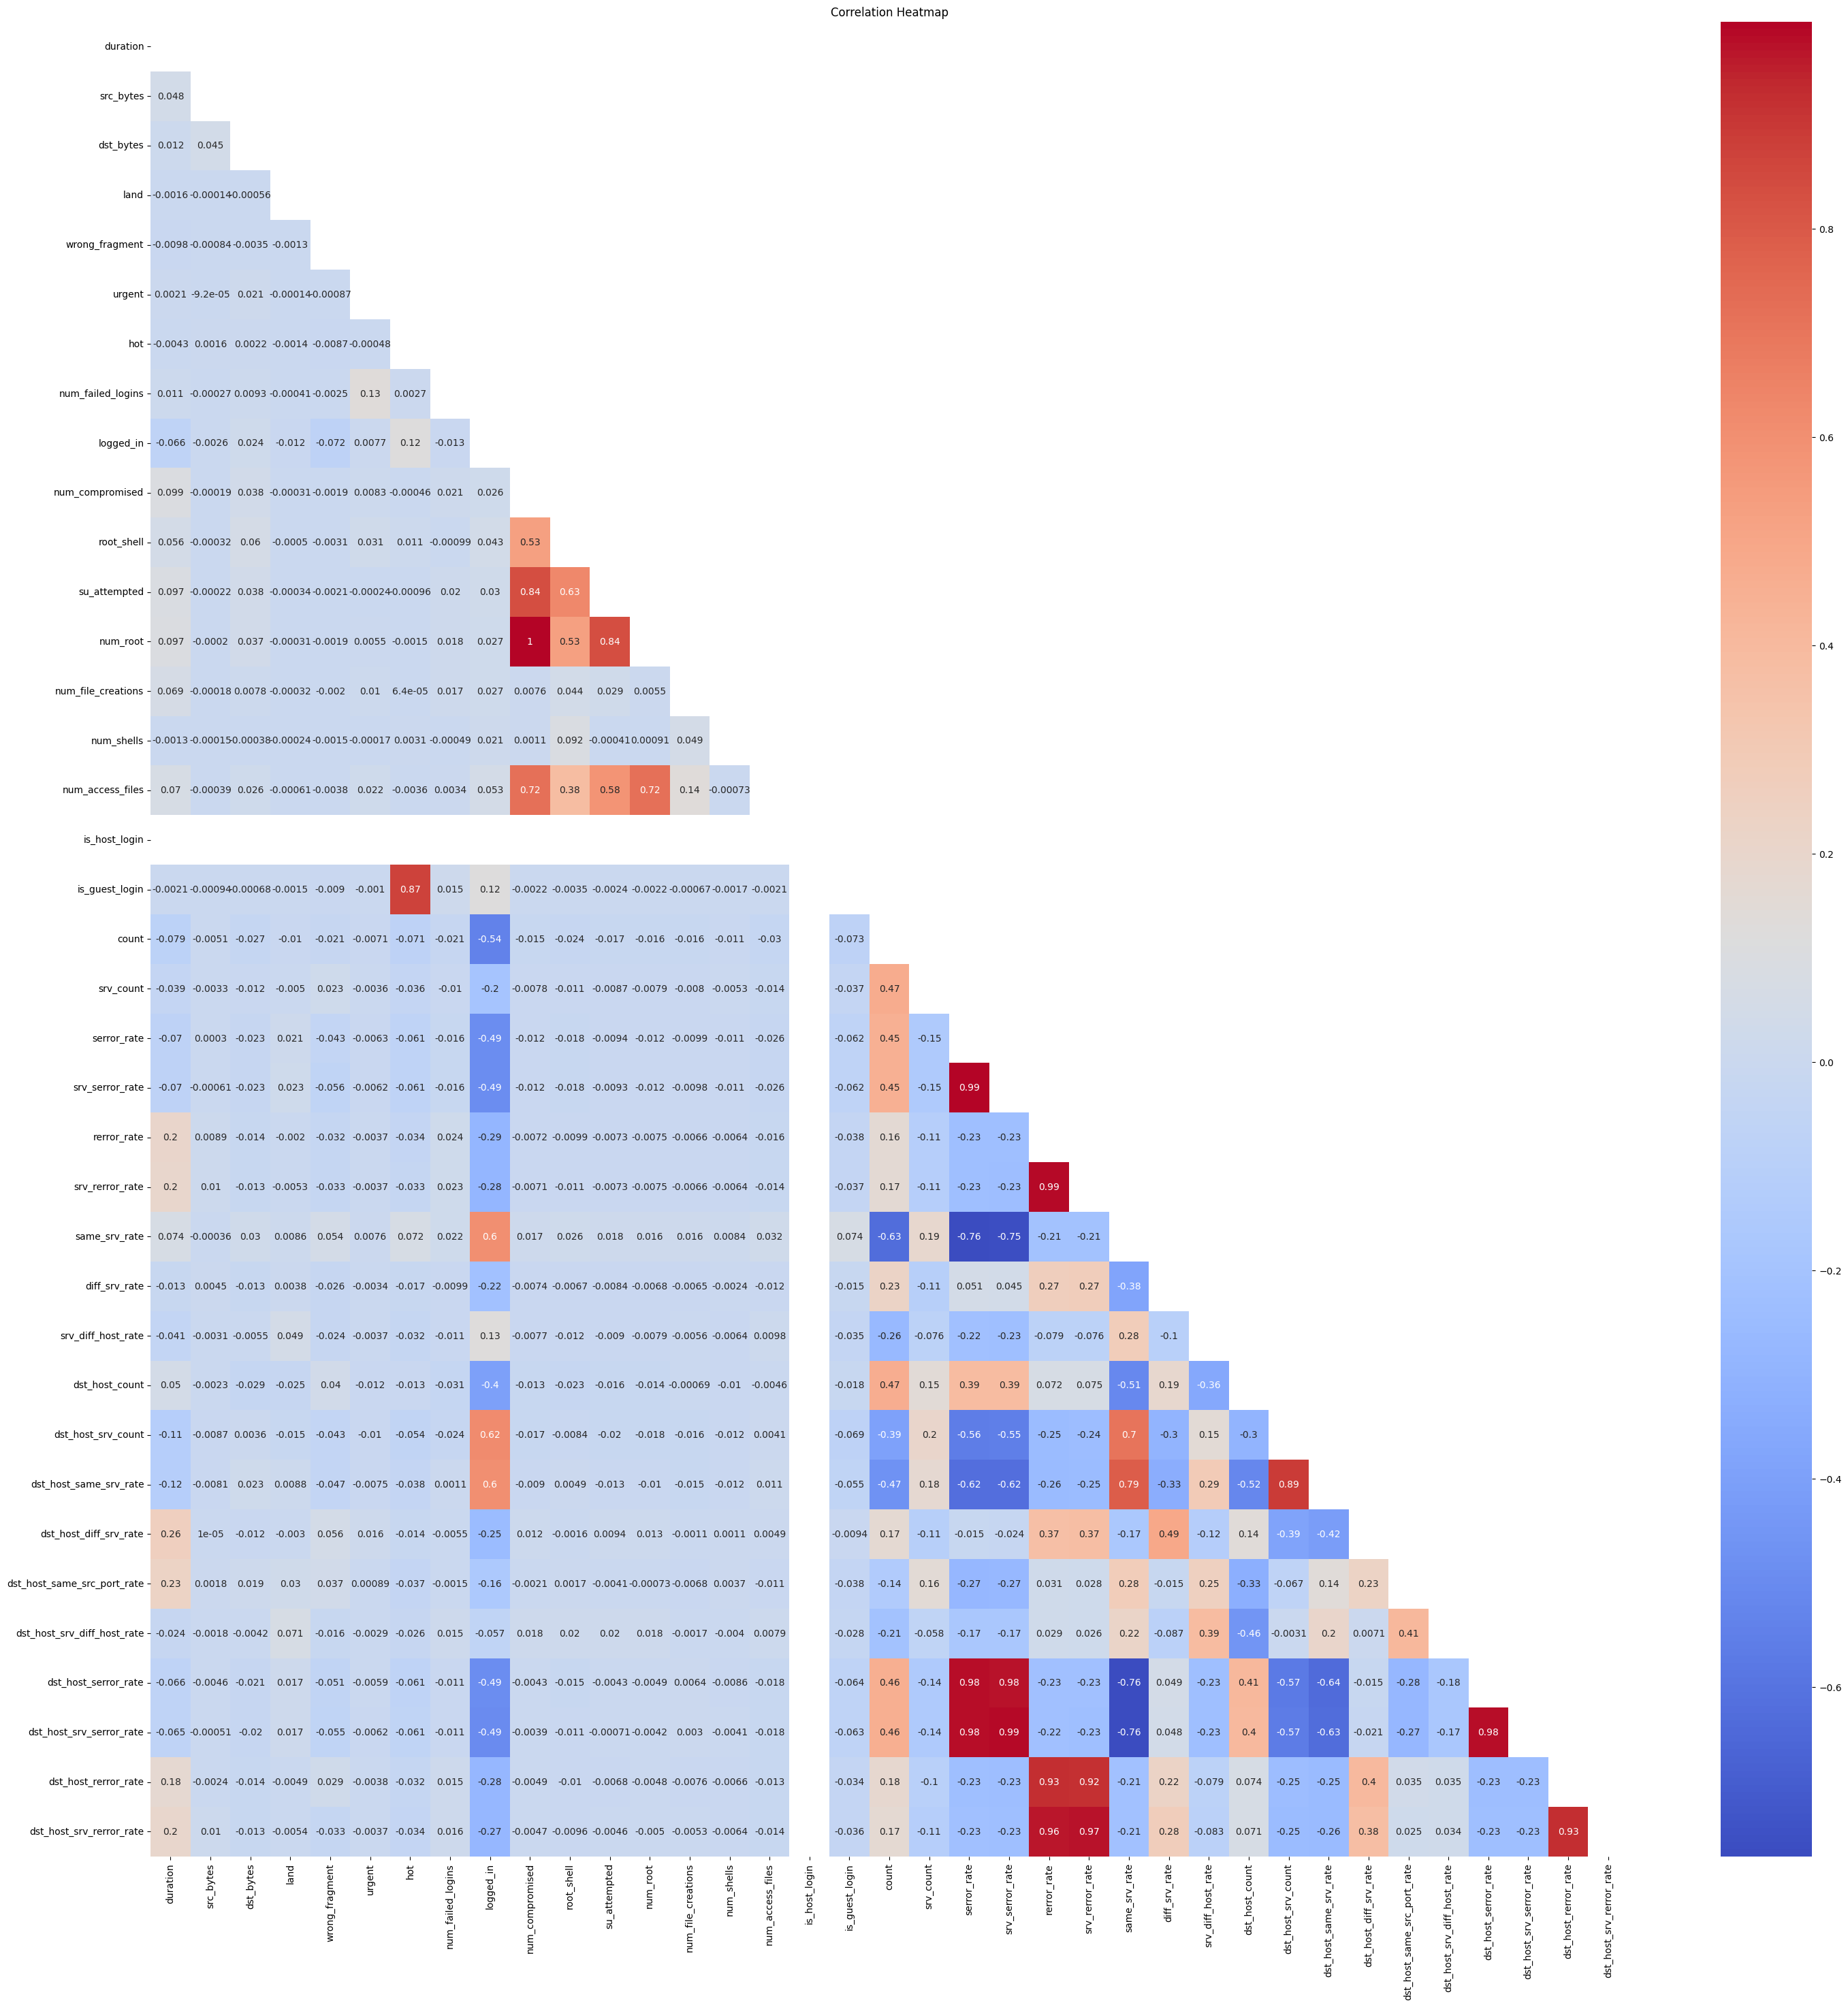

In [23]:
numeric_categorical_features = sampled_df_train.select_dtypes(include=['int', 'float']).columns
df_numeric_categorical = sampled_df_train[numeric_categorical_features]

correlation_matrix = df_numeric_categorical.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(35, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap')

plt.show()

Observations:

* num_outbund_cmds have no correlations with other features since all the values are 0
* srv_serror_rate and serror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* srv_rerror_rate and rerror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_rerror_rate and dst_host_srv_rerror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_srv_rerror_rate and srv_error_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_serror_rate and dst_host_srv_serror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_same_srv_rate and dst_host_srv_count are nearly perfectly correlated positively, they have pretty much the same variance
* root and compromised are nearly perfectly correlated positively, they have pretty much the same variance

In [24]:
def get_high_correlations(df, threshold=0.5):
    correlation_matrix = df.corr().values

    num_rows, num_cols = correlation_matrix.shape
    data = []

    for i in range(num_rows):
        for j in range(i):
            value = correlation_matrix[i, j]
            value = abs(value)
            if value > threshold:
                data.append([df.columns[i], df.columns[j], value])

    result_df = pd.DataFrame(data, columns=['Column 1', 'Column 2', 'Correlation'])
    result_df = result_df.sort_values(by='Correlation', ascending=False)

    return result_df



get_high_correlations(df_numeric_categorical, threshold=0.85)

,Column 1,Column 2,Correlation
0,num_root,num_compromised,0.998639
2,srv_serror_rate,serror_rate,0.993046
3,srv_rerror_rate,rerror_rate,0.988736
8,dst_host_srv_serror_rate,srv_serror_rate,0.986207
9,dst_host_srv_serror_rate,dst_host_serror_rate,0.984051
7,dst_host_srv_serror_rate,serror_rate,0.980858
5,dst_host_serror_rate,serror_rate,0.979046
6,dst_host_serror_rate,srv_serror_rate,0.977050
13,dst_host_srv_rerror_rate,srv_rerror_rate,0.971950
12,dst_host_srv_rerror_rate,rerror_rate,0.964956


In [25]:
def calculate_correlation_sum(df):
    merged_df = pd.DataFrame(columns=['Variable', 'Correlation Sum'])

    merged_df['Variable'] = pd.concat([df['Column 1'], df['Column 2']]).reset_index(drop=True)
    merged_df['Correlation Sum'] = pd.concat([df['Correlation'], df['Correlation']]).reset_index(drop=True)

    correlation_sum = merged_df.groupby('Variable')['Correlation Sum'].sum().sort_values(ascending=False)
    
    correlation_sum_df = pd.DataFrame({'Variable': correlation_sum.index, 'Correlation Sum': correlation_sum.values})
    
    return correlation_sum_df

calculate_correlation_sum(get_high_correlations(df_numeric_categorical, threshold=0.85))

,Variable,Correlation Sum
0,srv_serror_rate,2.956303
1,serror_rate,2.952950
2,dst_host_srv_serror_rate,2.951115
3,dst_host_serror_rate,2.940146
4,rerror_rate,2.881149
5,srv_rerror_rate,2.879279
6,dst_host_srv_rerror_rate,2.863107
7,dst_host_rerror_rate,2.772252
8,num_compromised,0.998639
9,num_root,0.998639


In [26]:
def drop_lowest_correlation(df, threshold=0.5):
    dropped_features = []
  
    while True:
        high_correlations = get_high_correlations(df, threshold)
        
        if high_correlations.empty:
            break
        
        correlation_sums = calculate_correlation_sum(high_correlations.tail(1))
        lowest_correlation = correlation_sums.iloc[0]['Variable']
        
        df = df.drop([lowest_correlation], axis=1)
        
        dropped_features.append(lowest_correlation)
        print(f"Dropped feature: {lowest_correlation}")
    
    return df, dropped_features

print(df_numeric_categorical.shape)
df_numeric_categorical, dropped_features = drop_lowest_correlation(df_numeric_categorical, threshold=0.85)
print(df_numeric_categorical.shape)
get_high_correlations(df_numeric_categorical, threshold=0.70)

(44000, 37)
Dropped feature: hot
Dropped feature: dst_host_same_srv_rate
Dropped feature: dst_host_rerror_rate
Dropped feature: dst_host_srv_rerror_rate
Dropped feature: dst_host_serror_rate
Dropped feature: dst_host_srv_serror_rate
Dropped feature: rerror_rate
Dropped feature: serror_rate
Dropped feature: num_compromised
(44000, 28)


,Column 1,Column 2,Correlation
0,num_root,su_attempted,0.836673
2,same_srv_rate,srv_serror_rate,0.754557
1,num_access_files,num_root,0.722950
3,dst_host_srv_count,same_srv_rate,0.703184


In [27]:
print(dropped_features)
print(df_test.shape)
df_test.drop(dropped_features, axis=1, inplace=True)
print(df_test.shape)
print(sampled_df_train.shape)
sampled_df_train.drop(dropped_features, axis=1, inplace=True)
print(sampled_df_train.shape)

['hot', 'dst_host_same_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'rerror_rate', 'serror_rate', 'num_compromised']
(22544, 41)
(22544, 32)
(44000, 41)
(44000, 32)


**We removed some variables based on high corrolation**

**Categorical variables**

In [28]:
def plot_histograms(df, feature, x=10, y=10, title=True):
    unique_features = df[feature].unique()
    value_frequencies = df[feature].value_counts()
    sorted_features = value_frequencies.index.tolist()
    num_plots = len(unique_features)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(x, y))
    
    if title:
        fig.suptitle(f"Distribution of attack for each {feature}", fontsize=14, ha='center')
    
    for i, feat in enumerate(sorted_features):
        feat_df = df[df[feature] == feat]
        unique_attacks = feat_df['attack'].unique()
        
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.histplot(feat_df['attack'], bins=len(unique_attacks), ax=ax)
        ax.set_xlabel('Attack')
        ax.set_ylabel('Frequency')
        ax.set_title(f'{feature}: {feat}')
    
    # Remove any empty subplots
    if num_plots < num_rows * num_cols:
        empty_plots = num_rows * num_cols - num_plots
        for i in range(num_plots, num_plots + empty_plots):
            fig.delaxes(axes[i // num_cols, i % num_cols])
    
    plt.tight_layout()
    plt.show()

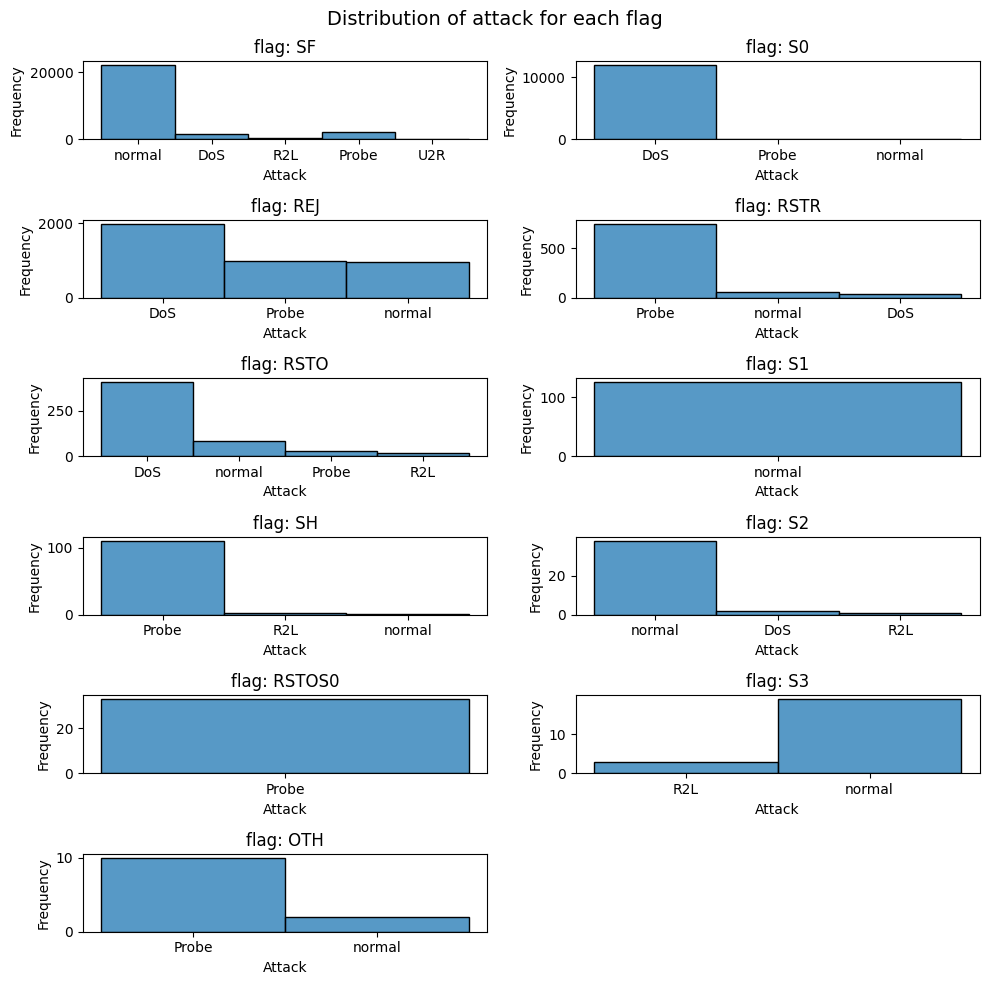

In [29]:
plot_histograms(sampled_df_train, 'flag')

       Value Frequency  Percentage
Rank                              
1         SF     26193   59.529545
2         S0     12146   27.604545
3        REJ      3922    8.913636
4       RSTR       849    1.929545
5       RSTO       541    1.229545
6         S1       126    0.286364
7         SH       115    0.261364
8         S2        41    0.093182
9     RSTOS0        33    0.075000
10        S3        22    0.050000
11       OTH        12    0.027273


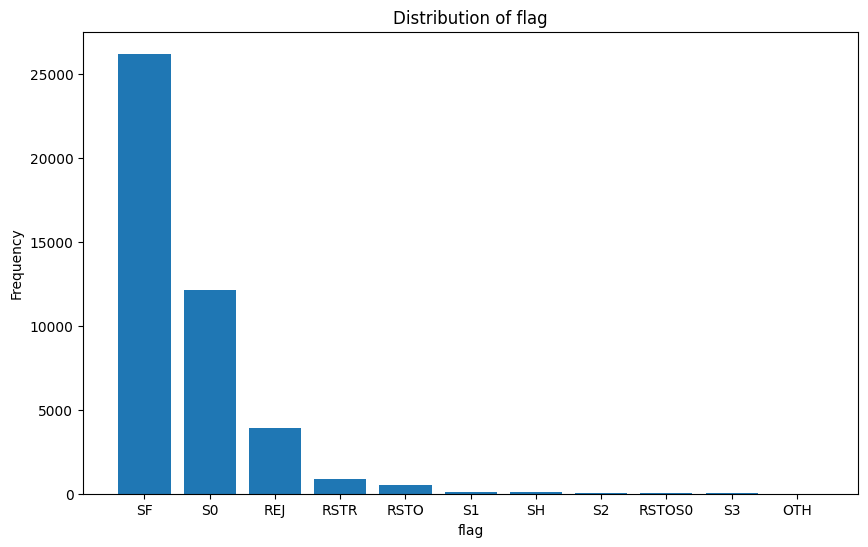

In [30]:
plot_histogram(sampled_df_train, 'flag')

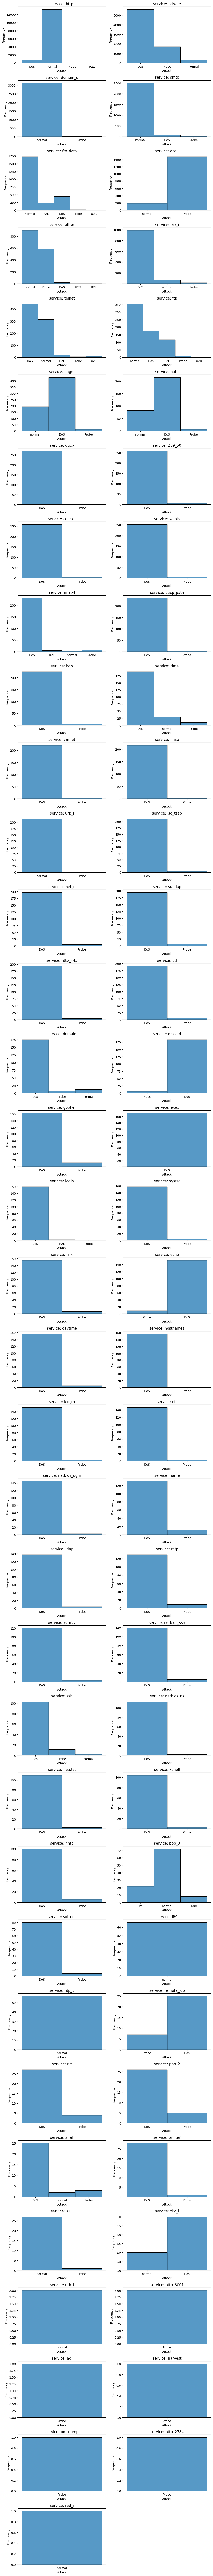

In [31]:
plot_histograms(sampled_df_train, 'service', 10, 120, False)

            Value Frequency  Percentage
Rank                                   
1            http     14011   31.843182
2         private      7638   17.359091
3        domain_u      3135    7.125000
4            smtp      2598    5.904545
5        ftp_data      2417    5.493182
6           eco_i      1666    3.786364
7           other      1513    3.438636
8           ecr_i      1081    2.456818
9          telnet       795    1.806818
10            ftp       656    1.490909
11         finger       638    1.450000
12           auth       304    0.690909
13           uucp       273    0.620455
14         Z39_50       264    0.600000
15        courier       262    0.595455
16          whois       256    0.581818
17          imap4       246    0.559091
18      uucp_path       237    0.538636
19            bgp       230    0.522727
20           time       229    0.520455
21          vmnet       225    0.511364
22           nnsp       218    0.495455
23          urp_i       215    0.488636


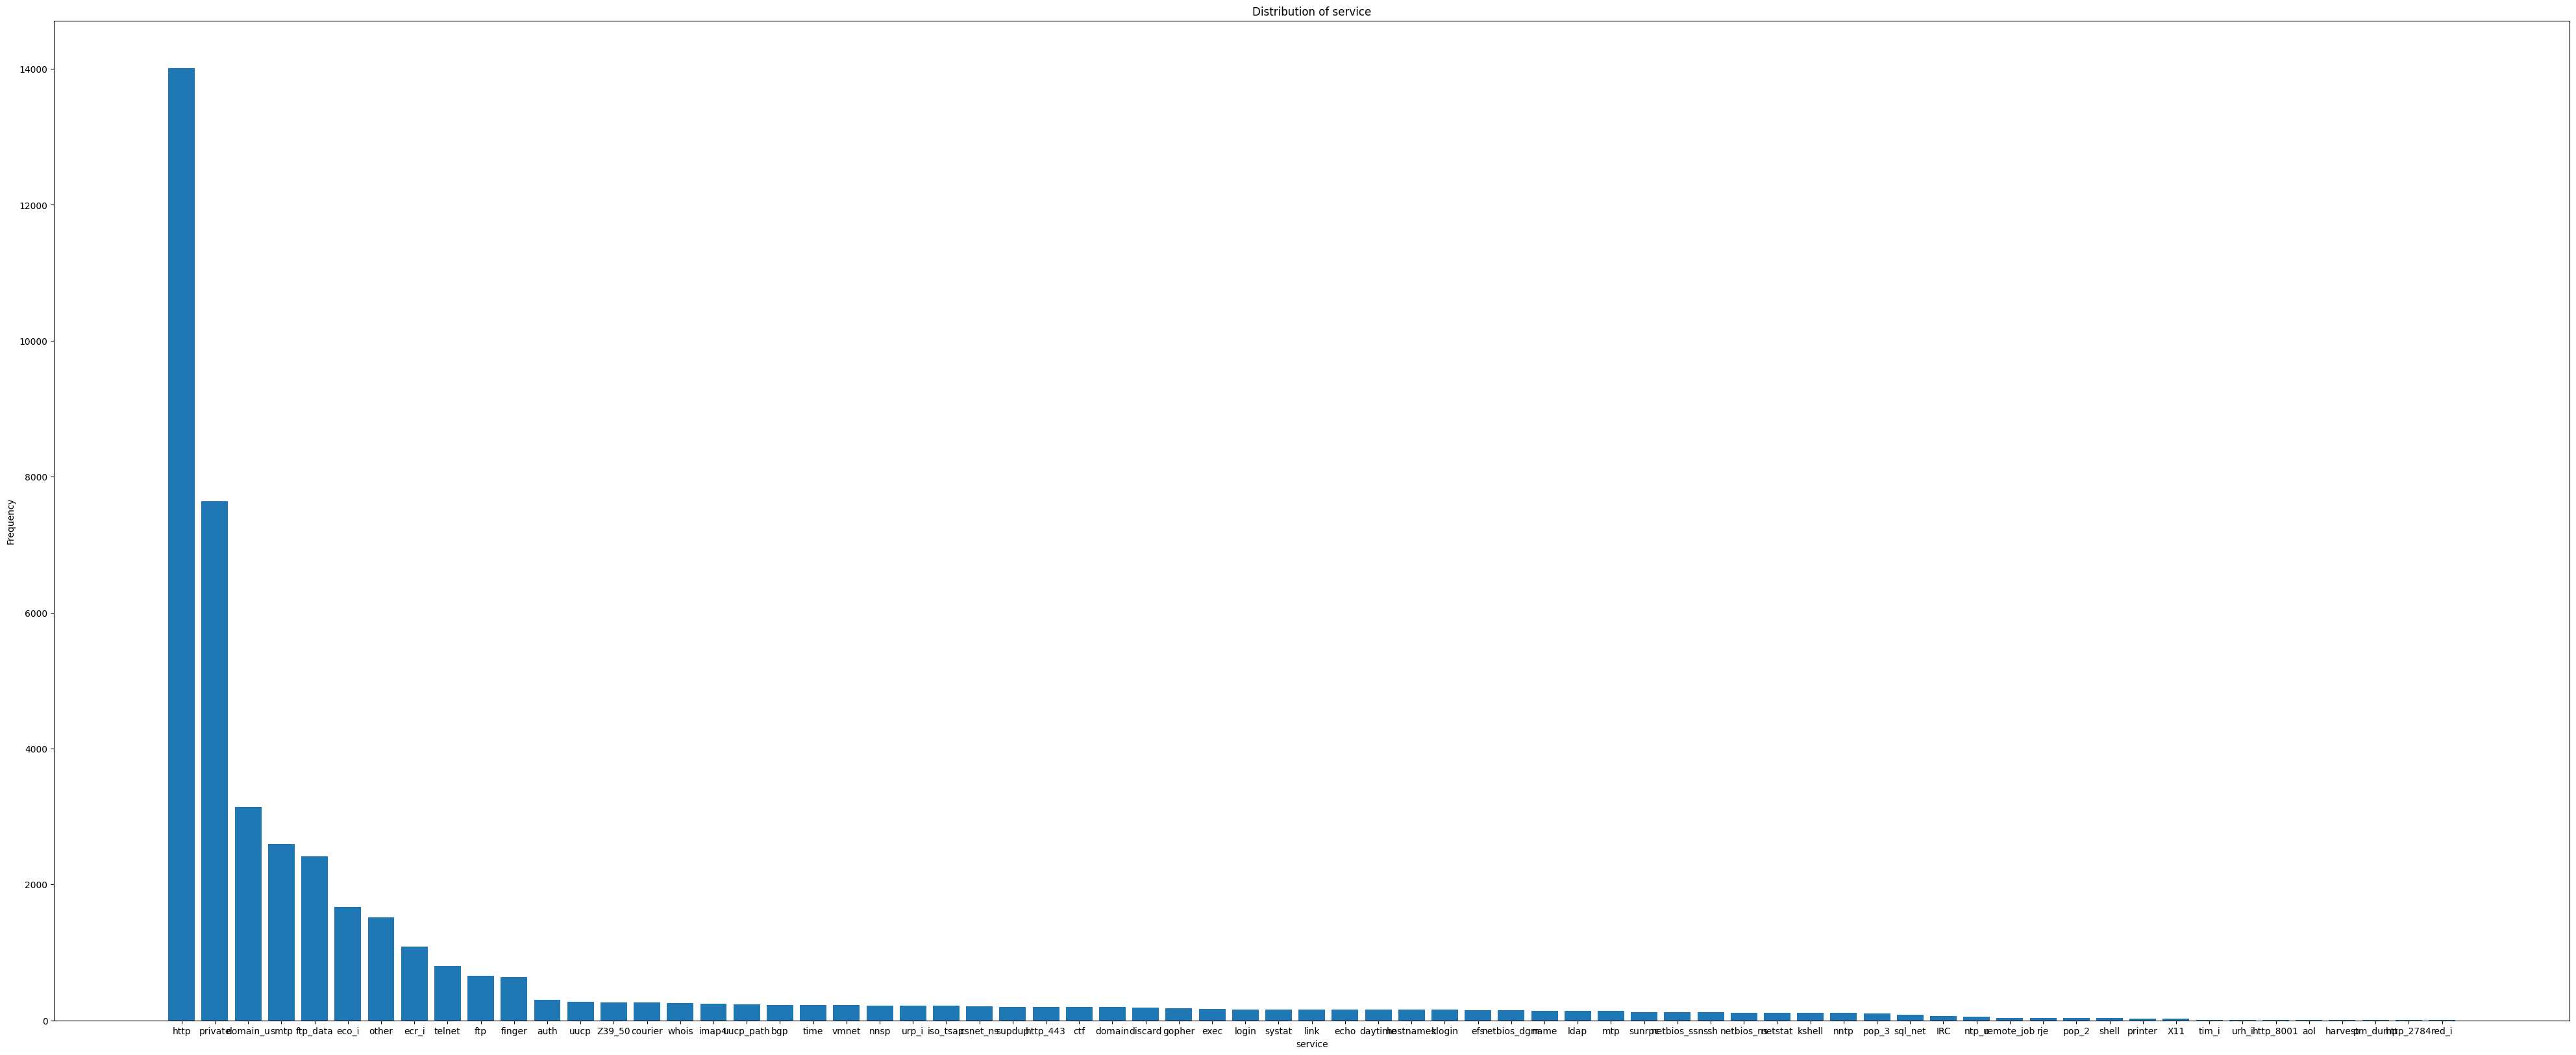

In [32]:
pd.set_option('display.max_rows', 100)
plot_histogram(sampled_df_train, 'service', 50, 20)

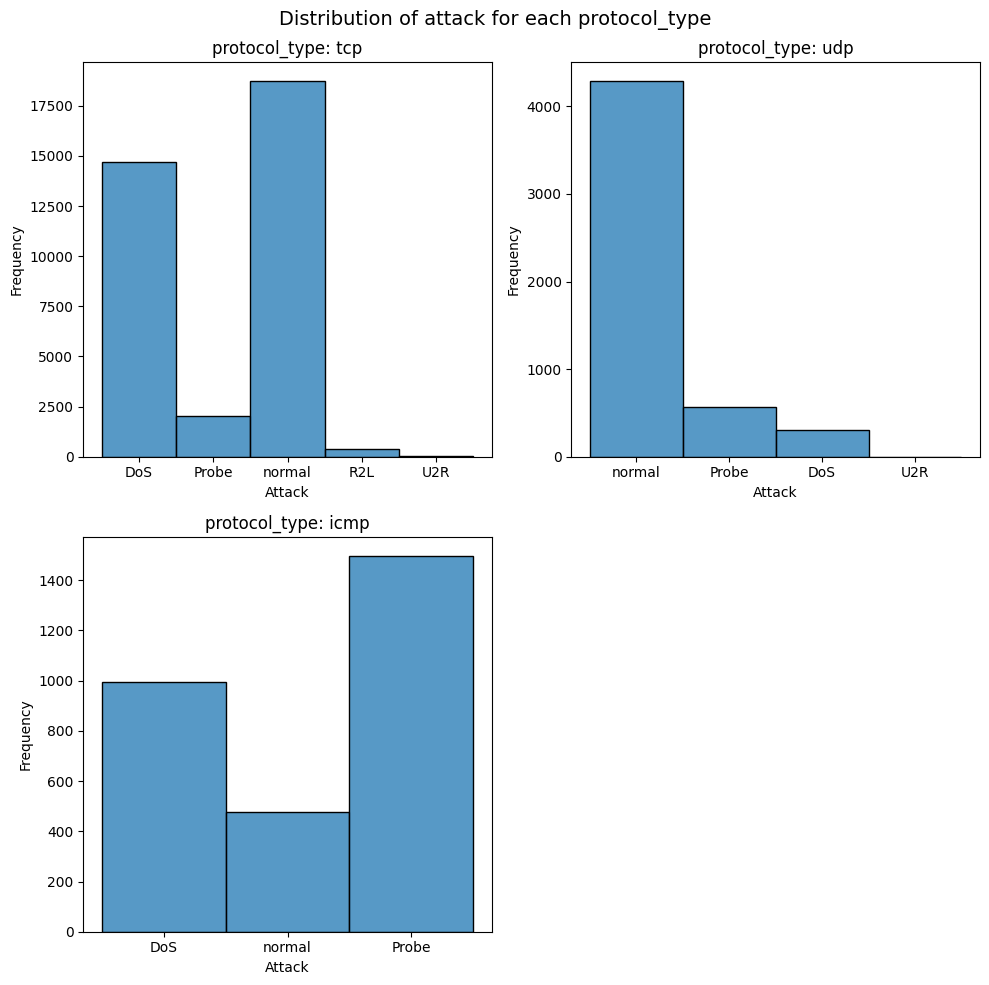

In [33]:
plot_histograms(sampled_df_train, 'protocol_type')

**All of the categorical variables are highly unbalanced**

In [34]:
df_train2 = df_train2[df_train2['protocol_type']=='tcp']
df_test2 = df_test2[df_test2['protocol_type']=='tcp']

df_train2.drop(columns='protocol_type', axis=1, inplace=True)
df_test2.drop(columns='protocol_type', axis=1, inplace=True)

In [35]:
df_train2.keys()

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

**Numerical variables**

In [36]:
def plot_scatterplots(df, target_variable='attack', x=10, y=6):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    num_plots = len(numerical_columns)
    num_cols = 2  # Number of columns in the grid
    num_rows = (num_plots + 1) // num_cols  # Number of rows in the grid
    
    target_codes, target_labels = pd.factorize(df[target_variable])

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(x, y))
    fig.tight_layout(pad=4.0)

    for i, column in enumerate(numerical_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        ax.scatter(df[column], target_codes, c=target_codes, cmap='viridis')
        ax.set_xlabel(column)
        ax.set_ylabel(target_variable)
        ax.set_yticks(np.arange(len(target_labels)))
        ax.set_yticklabels(target_labels)
        ax.set_title(f'{column} vs {target_variable}')

    plt.show()

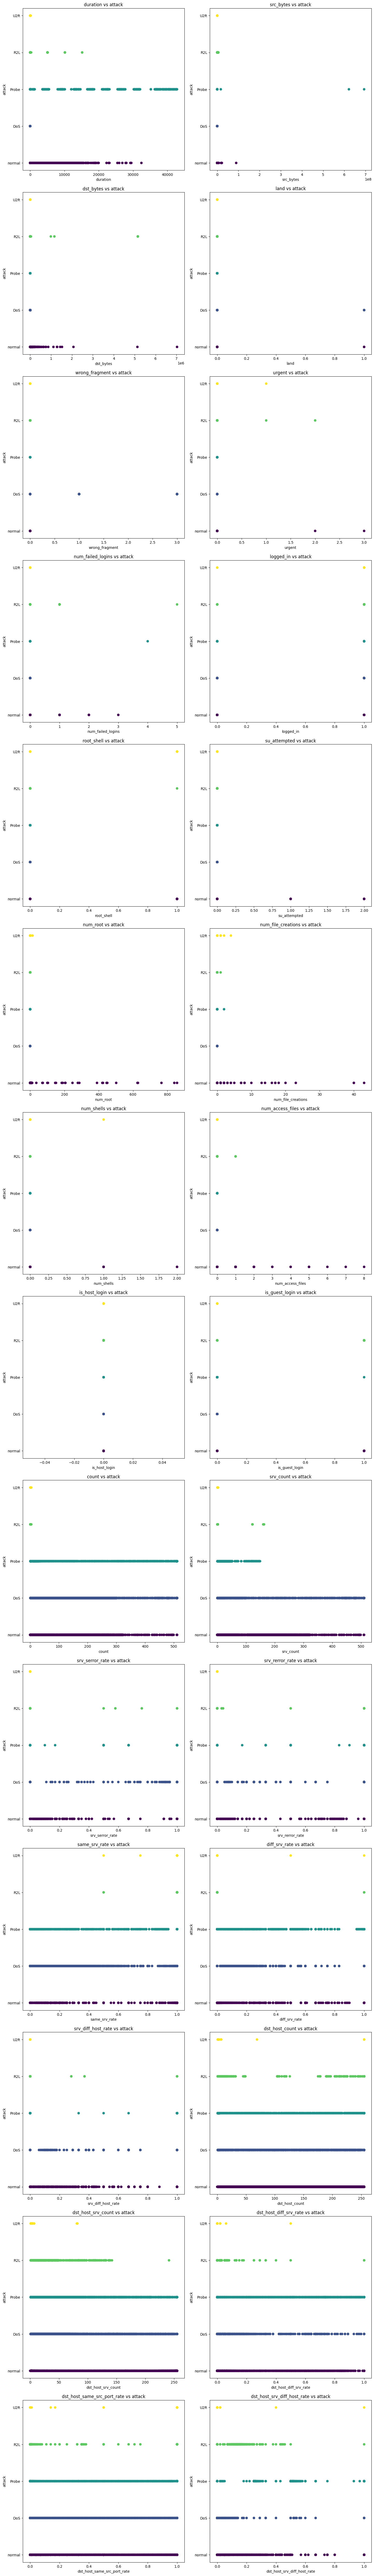

In [37]:
plot_scatterplots(sampled_df_train,x=15,y=100)

**We cab some outliers in the numerical variables which could help us detect the anomalities**

In [38]:
import math

def showBoxplot(df, features):
    num_plots = len(features)
    num_rows = math.ceil(math.sqrt(num_plots))
    num_cols = math.ceil(num_plots / num_rows)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5)

    if num_plots % num_cols != 0:
        empty_plots = num_cols - (num_plots % num_cols)
        for i in range(empty_plots):
            fig.delaxes(axes[-1, -1 - i])

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row][col] if num_rows > 1 else axes[col]

        ax.boxplot(df[feature])
        ax.set_title(feature)

    plt.tight_layout()
    plt.show()

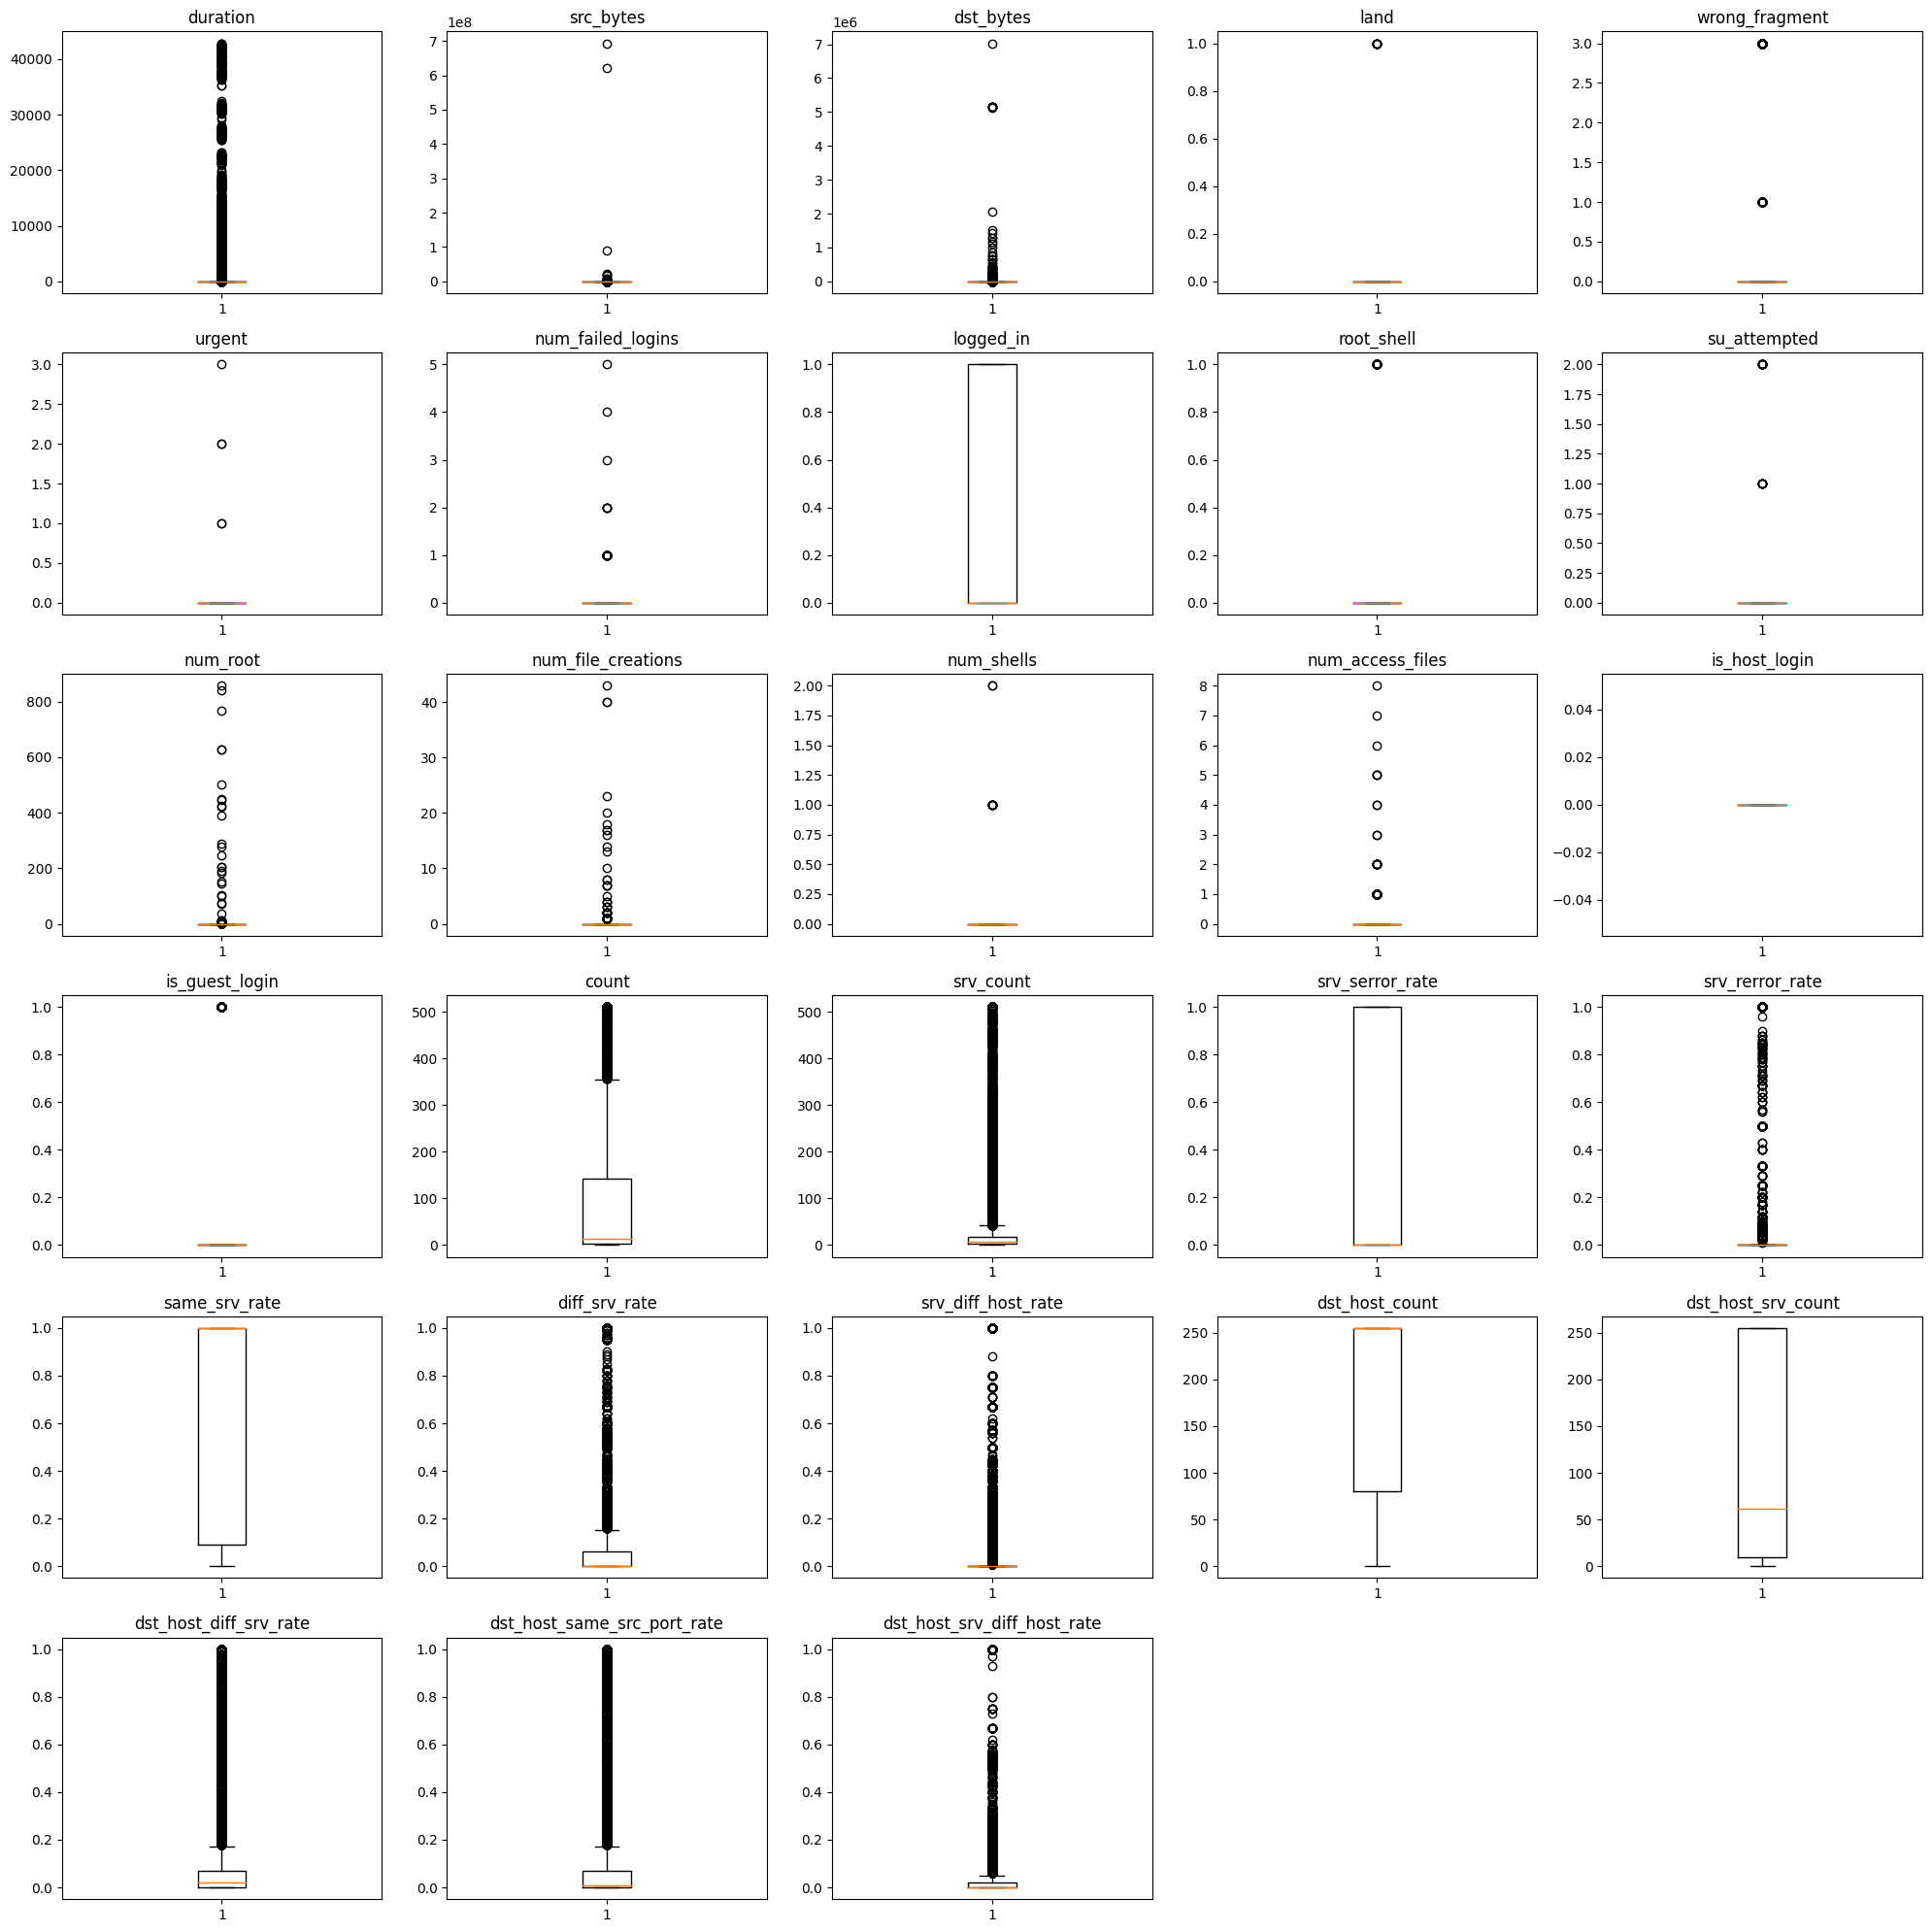

In [39]:
numeric_features = sampled_df_train.select_dtypes(include=['int', 'float']).columns
showBoxplot(sampled_df_train, numeric_features)

In [40]:
print(calculate_value_frequencies(df_train2, 'urgent')) #Dropping this feature because the majority of the values (0.99) takes value 0
print(calculate_value_frequencies(df_train2, 'wrong_fragment')) #Dropping this feature because the majority of the values (0.99) takes value 0
print(calculate_value_frequencies(df_train2, 'hot')) #97.87% of values are 0
print(calculate_value_frequencies(df_train2, 'duration')) #92.04% of values are 0
print(calculate_value_frequencies(df_train2, 'src_bytes')) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset
print(calculate_value_frequencies(df_train2, 'dst_bytes')) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset
print(calculate_value_frequencies(df_train2, 'num_failed_logins')) # the majority of the values (99.9%) takes value 0
print(calculate_value_frequencies(df_train2, 'num_compromised')) #98.97% of the values are 0
print(calculate_value_frequencies(df_train2, 'num_file_creations')) #the majority of the values (99.77%) takes value 0
print(calculate_value_frequencies(df_train2, 'num_shells')) # the majority of the values (99.96%) takes value 0
print(calculate_value_frequencies(df_train2, 'num_access_files')) # the majority of the values (99.7%) takes value 0
print(calculate_value_frequencies(df_train2, 'count')) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset
print(calculate_value_frequencies(df_train2, 'srv_count')) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset

      Value Frequency  Percentage
Rank                             
1       0.0     35863   99.986060
2       1.0         2    0.005576
3       2.0         2    0.005576
4       3.0         1    0.002788
      Value Frequency  Percentage
Rank                             
1       0.0     35868       100.0
      Value Frequency  Percentage
Rank                             
1       0.0     34912   97.334672
2       2.0       356    0.992528
3       1.0       124    0.345712
4      28.0       107    0.298316
5      30.0       104    0.289952
6       4.0        71    0.197948
7       6.0        51    0.142188
8       5.0        27    0.075276
9      24.0        24    0.066912
10     19.0        21    0.058548
11     18.0        20    0.055760
12     22.0        17    0.047396
13      3.0        14    0.039032
14     14.0         9    0.025092
15     20.0         3    0.008364
16      7.0         3    0.008364
17     25.0         2    0.005576
18     11.0         1    0.002788
19      9.0   

In [41]:
df_train2.drop(columns=['service','flag','num_root','src_bytes'
    ,'dst_bytes'
    ,'urgent'
    ,'num_failed_logins'
    ,'num_compromised'
    ,'root_shell'
    ,'su_attempted'
    ,'num_root'
    ,'num_file_creations'
    ,'num_shells'
    ,'num_access_files'
    ,'is_host_login'
    ,'is_guest_login'
    ,'wrong_fragment'], axis=1, inplace=True)
df_test2.drop(columns=['service','flag','num_outbound_cmds','num_root','src_bytes'
    ,'dst_bytes'
    ,'urgent'
    ,'num_failed_logins'
    ,'num_compromised'
    ,'root_shell'
    ,'su_attempted'
    ,'num_root'
    ,'num_file_creations'
    ,'num_shells'
    ,'num_access_files'
    ,'is_host_login'
    ,'is_guest_login'
    ,'wrong_fragment'],axis=1, inplace=True)

# **v. Encoding and Normalization**

In [42]:
categorical_columns = ['protocol_type', 'service', 'flag']

sampled_df_train_encoded = pd.get_dummies(sampled_df_train, columns=categorical_columns)
df_test_encoded = pd.get_dummies(df_test, columns=categorical_columns)

sampled_df_train_encoded, df_test_encoded = sampled_df_train_encoded.align(df_test_encoded, axis=1, join='inner')

**We use One Hot encoding for the categorical variables**

In [43]:
from sklearn.preprocessing import RobustScaler

X = sampled_df_train_encoded.drop('attack', axis=1)
y = sampled_df_train_encoded['attack']

scaler = RobustScaler()
sampled_df_train_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

sampled_df_train_scaled['attack'] = y

**We are using the Robust Scaler due to its resilence to the outliers**

In [44]:
X = df_test_encoded.drop('attack', axis=1)
y = df_test_encoded['attack']

scaler = RobustScaler()
df_test_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df_test_scaled['attack'] = y

In [45]:
df_train2[['land', 'logged_in']] = df_train2[['land', 'logged_in']].astype(float)
df_test2[['land', 'logged_in']] = df_test2[['land', 'logged_in']].astype(float)

df_train2['class'] = (df_train2['class'] != 'normal').astype(int)
df_test2['class'] = (df_test2['class'] != 'normal').astype(int)

df_train2 = df_train2.reset_index().drop(columns='index')
df_test2 = df_test2.reset_index().drop(columns='index')

X_train = df_train2.drop('class', axis=1)
y_train = df_train2['class']

X_test = df_test2.drop('class', axis=1)
y_test = df_test2['class']

In [46]:
d_raw_train = df_train2.copy()
d_raw_test = df_test2.copy()

d_raw_train_normal = d_raw_train[d_raw_train['class'] == 0]
X_train_normal = d_raw_train_normal.drop('class', axis=1)
y_train_normal = 0

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

d_norm_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
d_norm_train['class'] = y_train

d_norm_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
d_norm_test['class'] = y_test

d_norm_train_normal = pd.DataFrame(scaler.fit_transform(X_train_normal), columns=X_train_normal.columns)
d_norm_train_normal['class'] = y_train_normal

In [48]:
len(d_norm_train)

35868

In [49]:
d_norm_train.columns

Index(['duration', 'land', 'hot', 'logged_in', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [50]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

def Best_n_components(df, params_grid,model):
    #pca = PCA()
    gsv =GridSearchCV(model, params_grid)
    gsv.fit(df)
    return gsv.best_params_

def PCA_Transformation(df, dim=None):
    if dim:
        pca = PCA(dim)
        data_transformed = pca.fit_transform(df)
        return pd.DataFrame(data_transformed)
    pca = PCA()
    params = {'n_components': np.arange(1, 24)}
    n = Best_n_components(df, params,pca)['n_components']
    pca = PCA(n)
    data_transformed = pca.fit_transform(df)
    return pd.DataFrame(data_transformed), n

In [51]:
d_raw_pca_train,n = PCA_Transformation(d_raw_train)

d_raw_pca_test = PCA_Transformation(d_raw_test,n)

d_raw_pca_train_normal = PCA_Transformation(d_raw_train_normal,n)

In [52]:
d_norm_pca_train,n = PCA_Transformation(d_norm_train)
print(n)
d_norm_pca_test = PCA_Transformation(d_norm_test,n)
print(n)
d_norm_pca_train_normal = PCA_Transformation(d_raw_train_normal,n)
print(n)

23
23
23


# **4. Modelling**

# DBSCAN

In [53]:
import time

def dbscanClustering(X,Y):
    from sklearn.cluster import DBSCAN
    
    while True:
        
        print("\n\n#########################################################################")
        print("DBSCAN ALGORITHM")
        print("#########################################################################")
              
        epsilon = input("epsilon[Decimal]:")
        
        try:
            epsilon = float(epsilon)
            
        except ValueError:
            
            print("Enter a Decimal number")
            
            
        if type(epsilon) == float:
            break
        
    while True:
        minSamples = input("Min Samples[Integer]:")
        
        try:
            minSamples = int(minSamples)
            
        except ValueError:
            
            print("Enter a Integer Number")
            
        if type(minSamples) == int:
            break
        
    while True:
        algorithm = input("Algorithm['auto’, ‘ball_tree’, ‘kd_tree’, 'brute']:")
            
        if algorithm == "auto" or algorithm == "ball_tree" or algorithm == "kd_tree" or algorithm == "brute":
            break
        
        else:
            print("Error\n\n")
            
    
    print("\nClustering...\n")

    #Compute DBSCAN
    start_time = time.time() 
    db = DBSCAN(eps= epsilon, min_samples = minSamples,algorithm = algorithm).fit(X)
    print("\n\nRun Time ->","--- %s seconds ---" % (time.time() - start_time))
    print("Data Successfully Clustered")
    
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    Z = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters = len(set(Z))
    n_noise_ = list(Z).count(-1)
    
    n = -1  # DBSCAN return index -1 cluster
    clusters = []
    while n + 1 < n_clusters:
        clusters.append(n)
        n += 1
    
    #DBSCAN Results
    dbscanR = pd.crosstab(Y,Z)
    maxVal = dbscanR.idxmax()
    
    return Z,clusters,n_noise_,dbscanR,maxVal

# DBSCAN F1 Score

In [54]:
def dbF1(Z,Y,clusters,maxVal):#F1 score for DBSCAN
    from sklearn.metrics import f1_score
    #Encoding data to F-score
    
    # This part of the code automatically assign the max-ocurring instance in each found cluster to that specific found cluster,in order to evaluate the clustering with greater ease.
    n = 0 # counter
    c = -1 # - counter max Value has negative index
    dictionaryCluster  = {} # creating an empty dictionary 
    f1 = 0
    average = ''
    
    while n < len(clusters):# while counter < number of clusters
        dictionaryCluster[clusters[n]] = maxVal[c] #creating key(cluster index) with value (max number of the clustering results) for every iteration
        n+=1
        c+=1
    
        
    Z[:] = [dictionaryCluster[item] for item in Z[:]] # match key with the index of klabels and replace it with key value
    
    Y = np.array(Y,dtype = int) #Making sure that labels are in a int array
    while True:
        
        average = input("Average Method[weighted,micro,macro]:")
        
        if average == "weighted" or average == "micro" or average == "macro":
            break
        
        else:
            
            print("Error\n\n")
    #score metric
    f1 = f1_score(Y,Z, average = average)
    return f1,dictionaryCluster

# DBSCAN Mutual Info Score

In [55]:
def dbNMI(Z,Y,clusters,maxVal):# Mutual info score for dbscan
    from sklearn.metrics import normalized_mutual_info_score
    # This part of the code automatically assign the max-ocurring instance in each found cluster to that specific found cluster,in order to evaluate the clustering with greater ease.
    n = 0 # counter
    c = -1 # - counter max Value has negative index
    NMI = 0
    dictionaryCluster  = {} # creating an empty dictionary 
    average = ''
    
    while n < len(clusters):# while counter < number of clusters
        dictionaryCluster[clusters[n]] = maxVal[c] #creating key(cluster index) with value (max number of the clustering results) for every iteration
        n+=1
        c+=1
    
    Y = np.array(Y,dtype = int) #Making sure that labels are in a int array

    while True:
        
        average = input("Average Method[geometric,min,arithmetic,max]:")
        
        if average == "geometric" or average == "min" or average == "arithmetic" or average == "max":
            break
        else:
            
            print("Error\n\n")
    #score metric
    NMI = normalized_mutual_info_score(Y, Z, average_method= average)
    
    return NMI,dictionaryCluster

# DBSCAN Adjusted Random Score

In [56]:
def dbARS(Z,Y,clusters,maxVal): # adjusted rand score for dbscan
    from sklearn.metrics import adjusted_rand_score
    
    # This part of the code automatically assign the max-ocurring instance in each found cluster to that specific found cluster,in order to evaluate the clustering with greater ease.
    n = 0 # counter
    c = -1 # - counter max Value has negative index
    ars = 0
    dictionaryCluster  = {} # creating an empty dictionary 
    
    while n < len(clusters):# while counter < number of clusters
        dictionaryCluster[clusters[n]] = maxVal[c] #creating key(cluster index) with value (max number of the clustering results) for every iteration
        n+=1
        c+=1
    #score metric
    ars = adjusted_rand_score(Y,Z)
    
    return ars,dictionaryCluster

In [57]:
!pip install kneed

In [58]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Calculate k-distance
def calculate_k_distance(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    return np.sort(distances[:, -1])


# Choose a value for k
k = 3

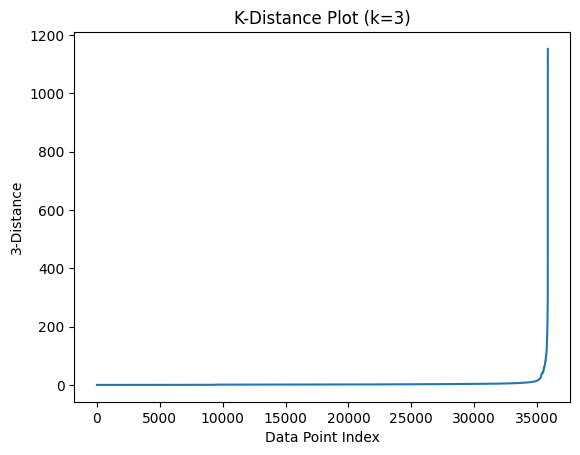

Knee Point: Index=35850, Distance=251.0458977811007
Chosen Epsilon: 251.0458977811007


In [59]:
# Plot k-distance graph and identify knee point
distances = calculate_k_distance(d_raw_pca_train, k)  # Assuming you want to use d_raw_pca_train for DBSCAN
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Data Point Index')
plt.ylabel(f'{k}-Distance')
plt.title(f'K-Distance Plot (k={k})')
plt.show()

# Identify the knee point
kneedle = KneeLocator(np.arange(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
knee_x = kneedle.knee
knee_y = distances[knee_x]

# Choose epsilon
epsilon = knee_y

print(f'Knee Point: Index={knee_x}, Distance={knee_y}')
print(f'Chosen Epsilon: {epsilon}')

In [60]:
# Call DBSCAN clustering function with chosen epsilon value
Z_clusters, found_clusters, noise_count, dbscan_results, max_values = dbscanClustering(d_raw_pca_train, y_train)

# Evaluate clustering results
f1_score, dictionary_cluster_f1 = dbF1(Z_clusters, y_train, found_clusters, max_values)
nmi_score, dictionary_cluster_nmi = dbNMI(Z_clusters, y_train, found_clusters, max_values)
ars_score, dictionary_cluster_ars = dbARS(Z_clusters, y_train, found_clusters, max_values)



#########################################################################
DBSCAN ALGORITHM
#########################################################################


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import f1_score, normalized_mutual_info_score

# Fixed epsilon and min_samples values
epsilon = 251.0458977811007
min_samples = 650

# Define the list of algorithms and average methods
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
average_methods_f1 = ['weighted', 'micro', 'macro']
average_methods_nmi = ['geometric', 'min', 'arithmetic', 'max']

# Iterate over all combinations
for algorithm in algorithms:
    for average_method_f1 in average_methods_f1:
        for average_method_nmi in average_methods_nmi:
            # Perform DBSCAN clustering
            db = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm=algorithm)
            clusters = db.fit_predict(X)  # Assuming X is your data
            # Compute F1 score
            f1 = f1_score(y_train, Z_clusters, average=average_method_f1)
            
            print(f'Algorithm: {algorithm}, Epsilon: {epsilon}, Min Samples: {min_samples}, Average Method (F1): {average_method_f1}, Average Method (NMI): {average_method_nmi}, F1 Score: {f1}')



In [ ]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.metrics import f1_score, normalized_mutual_info_score
import numpy as np
import matplotlib.pyplot as plt

# Calculate k-distance
def calculate_k_distance(X, k):
    distances = []
    for k_val in k:
        neigh = NearestNeighbors(n_neighbors=k_val)
        neigh.fit(X)
        dist, _ = neigh.kneighbors(X)
        distances.append(np.sort(dist[:, -1]))
    return distances

# Define data
X = d_raw_pca_train  # Assuming this is your data
y_train = y_train[:len(X)]  # Adjusting y_train to match the number of samples in X

# Choose a value for k
k = np.arange(1, 11)

# Plot k-distance graph and identify knee point
distances = calculate_k_distance(X, k)
for i, k_val in enumerate(k):
    plt.plot(np.arange(len(distances[i])), distances[i], label=f'k={k_val}')
plt.xlabel('Data Point Index')
plt.ylabel('k-Distance')
plt.title('K-Distance Plot')
plt.legend()
plt.show()

# Identify the knee point
knee_x_values = []
knee_y_values = []
for dist in distances:
    kneedle = KneeLocator(np.arange(len(dist)), dist, S=1.0, curve='convex', direction='increasing')
    knee_x = kneedle.knee
    knee_y = dist[knee_x]
    knee_x_values.append(knee_x)
    knee_y_values.append(knee_y)

# Choose epsilon
epsilon_values = knee_y_values
epsilon_dict = dict(zip(k, epsilon_values))

print('Knee Points:')
for k_val, knee_x, knee_y in zip(k, knee_x_values, knee_y_values):
    print(f'k={k_val}: Index={knee_x}, Distance={knee_y}')

print('Chosen Epsilons:')
for k_val, epsilon_val in epsilon_dict.items():
    print(f'k={k_val}: Epsilon={epsilon_val}')

# Dictionary to store maximum accuracy for each category
max_accuracy = {}

# Fixed min_samples values
min_samples = 650

# Define the list of algorithms and average methods
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
average_methods_f1 = ['weighted', 'micro', 'macro']

# Iterate over all combinations
for algorithm in algorithms:
    for average_method_f1 in average_methods_f1:
        for k_val, epsilon_val in epsilon_dict.items():
            # Perform DBSCAN clustering
            db = DBSCAN(eps=epsilon_val, min_samples=min_samples, algorithm=algorithm)
            clusters = db.fit_predict(X)
            # Compute F1 score
            f1 = f1_score(y_train, clusters, average=average_method_f1)
            # Compute NMI
            nmi = normalized_mutual_info_score(y_train, clusters)
            # Update max accuracy dictionary
            category = (algorithm, average_method_f1)
            if category not in max_accuracy or max_accuracy[category] < f1:
                max_accuracy[category] = f1

# Print the table of maximum accuracy for each category
print("Algorithm\tAverage Method (F1)\tMax Accuracy")
for category, accuracy in max_accuracy.items():
    algorithm, average_method_f1 = category
    print(f"{algorithm}\t{average_method_f1}\t{accuracy}")
